# FAISS Method

In [88]:
import faiss

In [89]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import tensorflow as tf
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import faiss
from matplotlib import pyplot as plt

In [90]:
# Defining 50 layer residual network : ResNet50 trained on million images, to get features for our dataset.
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))

#Extracting features of images by including image path and model trained above
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [110]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list
root_dir = '/home/mohit/Downloads/img'
filenames = sorted(get_file_list(root_dir))

In [111]:
import glob
img_lst = []
image_paths = glob.glob('/home/mohit/Downloads/img/*.jpg')
for image_path in image_paths:
    img_lst.append(image_path)

In [112]:
#Sampling the dataset, as the program takes a lot of time to run
imglist = img_lst[:500]

In [113]:
feature_list = []
for i in tqdm(range(len(imglist))):
    feature_list.append(extract_features(imglist[i], model))

100%|█████████████████████████████████████████| 500/500 [01:05<00:00,  7.61it/s]


In [114]:
features=np.array(feature_list)
features.shape

(500, 100352)

In [115]:

dimensions=features.shape[1]
db_vectors=features 
nlist = 1  # number of clusters
quantiser = faiss.IndexFlatL2(dimensions) #to assign the vectors to a particular cluster. This is index that uses the L2 distance metric 
index = faiss.IndexIVFFlat(quantiser, dimensions, nlist,   faiss.METRIC_L2) #defining index

In [116]:
print(index.is_trained)   # False
index.train(db_vectors)  # train on the database vectors
print(index.ntotal)   # 0
index.add(db_vectors)   # add the vectors and update the index
print(index.is_trained)  # True
print(index.ntotal)

False
0
True
500


In [117]:
nprobe = 1  # find 2 most similar clusters
n_query = 1000  
k = 10  # return 3 nearest neighbours
np.random.seed(0)   
#Trying out a random images at 23rd position in images folder :
distances, indices = index.search(features, k)

In [118]:
distances

array([[0.        , 1.3607525 , 1.3694136 , ..., 1.4379636 , 1.4386504 ,
        1.4499822 ],
       [0.        , 0.8792495 , 0.89824057, ..., 0.9549323 , 0.98407584,
        0.9870769 ],
       [0.        , 1.2619119 , 1.2771363 , ..., 1.3030097 , 1.3177285 ,
        1.3270603 ],
       ...,
       [0.        , 0.74980766, 0.8103282 , ..., 0.89928806, 0.9018522 ,
        0.9034847 ],
       [0.        , 0.9482283 , 0.96652824, ..., 1.0233004 , 1.0297172 ,
        1.0388283 ],
       [0.        , 1.2867026 , 1.2910261 , ..., 1.3686638 , 1.3702253 ,
        1.3837401 ]], dtype=float32)

In [119]:
indices

array([[  0, 455, 226, ...,   5, 124,   7],
       [  1,  58,  25, ..., 379, 219,  63],
       [  2,  74, 305, ..., 327, 193, 298],
       ...,
       [497,  61,  40, ..., 413, 166, 327],
       [498, 253, 391, ..., 337, 187, 422],
       [499, 140, 275, ..., 193, 407, 119]])

In [130]:
def faiss_similarity(img):
    feature_list=extract_features('/home/mohit/Downloads/img/'+str(img), model)
    nprobe = 2  # find 2 most similar clusters
    n_query = 1  
    k = 10  # return 10 nearest neighbours
    np.random.seed(0)
    dimensions=len(feature_list)   
    query_vectors = np.random.random((n_query, dimensions)).astype('float32')
    distances, indices = index.search(feature_list.reshape(1,-1), k)
    list_ind=indices.flatten().tolist()
    f, ax = plt.subplots(1, 10, figsize=(16, 8))
    for i,j in enumerate(list_ind):
        ax[i].imshow(plt.imread(imglist[j]))
        ax[i].set_axis_off()
    plt.show()

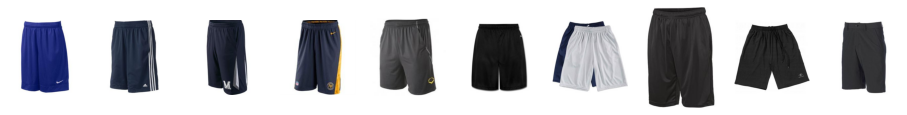

In [134]:
faiss_similarity('72.jpg') #278,72

In [173]:
imglist2 = []
for i in range(len(imglist)):
    imglist2.append(imglist[i])
print(len(imglist2))
print(imglist2)

500
['/home/mohit/Downloads/test1/42.jpg', '/home/mohit/Downloads/test1/320.jpg', '/home/mohit/Downloads/test1/495.jpg', '/home/mohit/Downloads/test1/185.jpg', '/home/mohit/Downloads/test1/149.jpg', '/home/mohit/Downloads/test1/48.jpg', '/home/mohit/Downloads/test1/59.jpg', '/home/mohit/Downloads/test1/43.jpg', '/home/mohit/Downloads/test1/367.jpg', '/home/mohit/Downloads/test1/100.jpg', '/home/mohit/Downloads/test1/488.jpg', '/home/mohit/Downloads/test1/75.jpg', '/home/mohit/Downloads/test1/155.jpg', '/home/mohit/Downloads/test1/169.jpg', '/home/mohit/Downloads/test1/164.jpg', '/home/mohit/Downloads/test1/267.jpg', '/home/mohit/Downloads/test1/212.jpg', '/home/mohit/Downloads/test1/36.jpg', '/home/mohit/Downloads/test1/403.jpg', '/home/mohit/Downloads/test1/54.jpg', '/home/mohit/Downloads/test1/389.jpg', '/home/mohit/Downloads/test1/242.jpg', '/home/mohit/Downloads/test1/273.jpg', '/home/mohit/Downloads/test1/331.jpg', '/home/mohit/Downloads/test1/132.jpg', '/home/mohit/Downloads/test

In [174]:
df_img = pd.DataFrame()
df_img['img'] = imglist2
df_img

,img
0,/home/mohit/Downloads/test1/42.jpg
1,/home/mohit/Downloads/test1/320.jpg
2,/home/mohit/Downloads/test1/495.jpg
3,/home/mohit/Downloads/test1/185.jpg
4,/home/mohit/Downloads/test1/149.jpg
...,...
495,/home/mohit/Downloads/test1/188.jpg
496,/home/mohit/Downloads/test1/498.jpg
497,/home/mohit/Downloads/test1/329.jpg
498,/home/mohit/Downloads/test1/31.jpg


In [175]:
df_indices = pd.DataFrame(indices)
imgref = df_img.to_dict()
imgref = imgref['img']
imgref

{0: '/home/mohit/Downloads/test1/42.jpg',
 1: '/home/mohit/Downloads/test1/320.jpg',
 2: '/home/mohit/Downloads/test1/495.jpg',
 3: '/home/mohit/Downloads/test1/185.jpg',
 4: '/home/mohit/Downloads/test1/149.jpg',
 5: '/home/mohit/Downloads/test1/48.jpg',
 6: '/home/mohit/Downloads/test1/59.jpg',
 7: '/home/mohit/Downloads/test1/43.jpg',
 8: '/home/mohit/Downloads/test1/367.jpg',
 9: '/home/mohit/Downloads/test1/100.jpg',
 10: '/home/mohit/Downloads/test1/488.jpg',
 11: '/home/mohit/Downloads/test1/75.jpg',
 12: '/home/mohit/Downloads/test1/155.jpg',
 13: '/home/mohit/Downloads/test1/169.jpg',
 14: '/home/mohit/Downloads/test1/164.jpg',
 15: '/home/mohit/Downloads/test1/267.jpg',
 16: '/home/mohit/Downloads/test1/212.jpg',
 17: '/home/mohit/Downloads/test1/36.jpg',
 18: '/home/mohit/Downloads/test1/403.jpg',
 19: '/home/mohit/Downloads/test1/54.jpg',
 20: '/home/mohit/Downloads/test1/389.jpg',
 21: '/home/mohit/Downloads/test1/242.jpg',
 22: '/home/mohit/Downloads/test1/273.jpg',
 23: 

In [176]:
df_indices = df_indices.replace(imgref)
df_indices

,0,1,2,3,4,5,6,7,8,9
0,/home/mohit/Downloads/test1/42.jpg,/home/mohit/Downloads/test1/432.jpg,/home/mohit/Downloads/test1/417.jpg,/home/mohit/Downloads/test1/429.jpg,/home/mohit/Downloads/test1/480.jpg,/home/mohit/Downloads/test1/402.jpg,/home/mohit/Downloads/test1/445.jpg,/home/mohit/Downloads/test1/48.jpg,/home/mohit/Downloads/test1/56.jpg,/home/mohit/Downloads/test1/43.jpg
1,/home/mohit/Downloads/test1/320.jpg,/home/mohit/Downloads/test1/334.jpg,/home/mohit/Downloads/test1/344.jpg,/home/mohit/Downloads/test1/361.jpg,/home/mohit/Downloads/test1/376.jpg,/home/mohit/Downloads/test1/365.jpg,/home/mohit/Downloads/test1/480.jpg,/home/mohit/Downloads/test1/335.jpg,/home/mohit/Downloads/test1/345.jpg,/home/mohit/Downloads/test1/341.jpg
2,/home/mohit/Downloads/test1/495.jpg,/home/mohit/Downloads/test1/478.jpg,/home/mohit/Downloads/test1/358.jpg,/home/mohit/Downloads/test1/365.jpg,/home/mohit/Downloads/test1/486.jpg,/home/mohit/Downloads/test1/475.jpg,/home/mohit/Downloads/test1/476.jpg,/home/mohit/Downloads/test1/301.jpg,/home/mohit/Downloads/test1/219.jpg,/home/mohit/Downloads/test1/376.jpg
3,/home/mohit/Downloads/test1/185.jpg,/home/mohit/Downloads/test1/81.jpg,/home/mohit/Downloads/test1/215.jpg,/home/mohit/Downloads/test1/66.jpg,/home/mohit/Downloads/test1/186.jpg,/home/mohit/Downloads/test1/181.jpg,/home/mohit/Downloads/test1/86.jpg,/home/mohit/Downloads/test1/300.jpg,/home/mohit/Downloads/test1/207.jpg,/home/mohit/Downloads/test1/163.jpg
4,/home/mohit/Downloads/test1/149.jpg,/home/mohit/Downloads/test1/126.jpg,/home/mohit/Downloads/test1/107.jpg,/home/mohit/Downloads/test1/98.jpg,/home/mohit/Downloads/test1/79.jpg,/home/mohit/Downloads/test1/144.jpg,/home/mohit/Downloads/test1/72.jpg,/home/mohit/Downloads/test1/137.jpg,/home/mohit/Downloads/test1/113.jpg,/home/mohit/Downloads/test1/87.jpg
...,...,...,...,...,...,...,...,...,...,...
495,/home/mohit/Downloads/test1/188.jpg,/home/mohit/Downloads/test1/189.jpg,/home/mohit/Downloads/test1/83.jpg,/home/mohit/Downloads/test1/191.jpg,/home/mohit/Downloads/test1/177.jpg,/home/mohit/Downloads/test1/182.jpg,/home/mohit/Downloads/test1/175.jpg,/home/mohit/Downloads/test1/213.jpg,/home/mohit/Downloads/test1/180.jpg,/home/mohit/Downloads/test1/69.jpg
496,/home/mohit/Downloads/test1/498.jpg,/home/mohit/Downloads/test1/476.jpg,/home/mohit/Downloads/test1/344.jpg,/home/mohit/Downloads/test1/365.jpg,/home/mohit/Downloads/test1/361.jpg,/home/mohit/Downloads/test1/375.jpg,/home/mohit/Downloads/test1/357.jpg,/home/mohit/Downloads/test1/314.jpg,/home/mohit/Downloads/test1/335.jpg,/home/mohit/Downloads/test1/358.jpg
497,/home/mohit/Downloads/test1/329.jpg,/home/mohit/Downloads/test1/246.jpg,/home/mohit/Downloads/test1/359.jpg,/home/mohit/Downloads/test1/376.jpg,/home/mohit/Downloads/test1/8.jpg,/home/mohit/Downloads/test1/279.jpg,/home/mohit/Downloads/test1/332.jpg,/home/mohit/Downloads/test1/355.jpg,/home/mohit/Downloads/test1/365.jpg,/home/mohit/Downloads/test1/301.jpg
498,/home/mohit/Downloads/test1/31.jpg,/home/mohit/Downloads/test1/60.jpg,/home/mohit/Downloads/test1/27.jpg,/home/mohit/Downloads/test1/54.jpg,/home/mohit/Downloads/test1/36.jpg,/home/mohit/Downloads/test1/1.jpg,/home/mohit/Downloads/test1/454.jpg,/home/mohit/Downloads/test1/168.jpg,/home/mohit/Downloads/test1/3.jpg,/home/mohit/Downloads/test1/343.jpg


In [177]:
df_indices.to_csv('Faiss.csv')

# Similarity Search Method

In [180]:
from tqdm import tqdm

import glob
import ntpath
import cv2

from sklearn.metrics.pairwise import cosine_similarity
import scipy as sc
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import io
import bson
import matplotlib.pyplot as plt
from skimage.io import imread   # or, whatever image library you prefer
import multiprocessing as mp      # will come in handy due to the size of the data
from PIL import Image

In [181]:
import glob
image_paths = glob.glob('/home/mohit/Downloads/img/*.jpg')

In [187]:
images = {}
for image_path in image_paths:
    image = cv2.imread(image_path, 3)
    b,g,r = cv2.split(image)           # Splitting the RGB Channels of the image
    image = cv2.merge([r,g,b]) 
    image = cv2.resize(image, (200, 200))
    images[image_path] = image

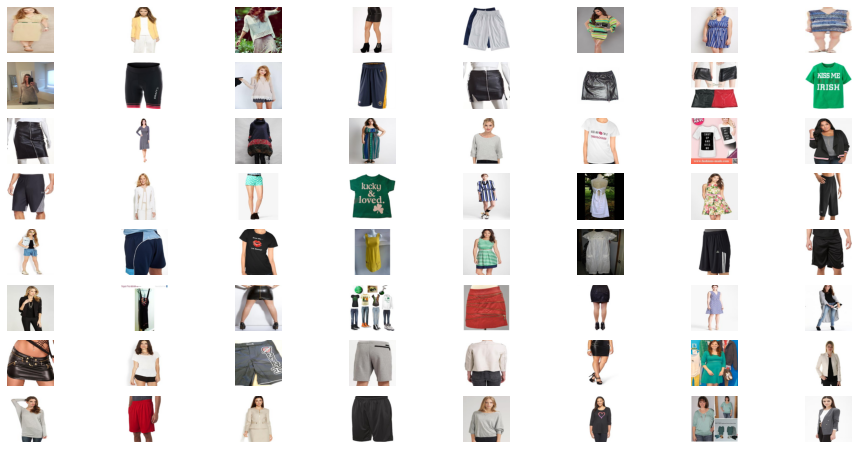

In [188]:
n_col = 8
n_row = 8
f, ax = plt.subplots(n_row, n_col, figsize=(16, 8))
for i in range(n_row):
    for j in range(n_col):
        ax[i, j].imshow(list(images.values())[n_col*i + j])
        ax[i, j].set_axis_off()

In [191]:
def load_image(image):
    image = plt.imread(image)
    img = tf.image.convert_image_dtype(image, tf.float32)
    img = tf.image.resize(img, [400, 400])
    img = img[tf.newaxis, :] # shape -> (batch_size, h, w, d)
    return img

# content layers describe the image subject
content_layers = ['block5_conv2'] 

# style layers describe the image style
# we exclude the upper level layes to focus on small-size style details
style_layers = [ 
        'block1_conv1',
        'block2_conv1',
        'block3_conv1', 
        #'block4_conv1', 
        #'block5_conv1'
    ] 

def selected_layers_model(layer_names, baseline_model):
    outputs = [baseline_model.get_layer(name).output for name in layer_names]
    model = Model([vgg.input], outputs)
    return model

# style embedding is computed as concatenation of gram matrices of the style layers
def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

class StyleModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(StyleModel, self).__init__()
        self.vgg =  selected_layers_model(style_layers + content_layers, vgg)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False

    def call(self, inputs):
        # scale back the pixel values
        inputs = inputs*255.0
        # preprocess them with respect to VGG19 stats
        preprocessed_input = preprocess_input(inputs)
        # pass through the reduced network
        outputs = self.vgg(preprocessed_input)
        # segregate the style and content representations
        style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                          outputs[self.num_style_layers:])

        # calculate the gram matrix for each layer
        style_outputs = [gram_matrix(style_output)
                         for style_output in style_outputs]

        # assign the content representation and gram matrix in
        # a layer by layer fashion in dicts
        content_dict = {content_name:value
                        for content_name, value
                        in zip(self.content_layers, content_outputs)}

        style_dict = {style_name:value
                      for style_name, value
                      in zip(self.style_layers, style_outputs)}

        return {'content':content_dict, 'style':style_dict}

vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

def image_to_style(image_tensor):
    extractor = StyleModel(style_layers, content_layers)
    return extractor(image_tensor)['style']

def style_to_vec(style):
    # concatenate gram matrics in a flat vector
    return np.hstack([np.ravel(s) for s in style.values()]) 
    
# compute styles
image_style_embeddings = {}
for image_path in tqdm(image_paths): 
    image_tensor = load_image(image_path)
    style = style_to_vec( image_to_style(image_tensor) )
    image_style_embeddings[image_path] = style

100%|█████████████████████████████████████████| 500/500 [06:17<00:00,  1.32it/s]


In [192]:
def search_by_style_display(reference_image, max_results=10):
    v0 = image_style_embeddings[reference_image]
    distances = {}
    for k,v in image_style_embeddings.items():
        d = sc.spatial.distance.cosine(v0, v)
        distances[k] = d

    sorted_neighbors = sorted(distances.items(), key=lambda x: x[1], reverse=False)
    
    f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i, img in enumerate(sorted_neighbors[:max_results]):
        ax[i].imshow(images[img[0]])
        ax[i].set_axis_off()
    
    plt.show()

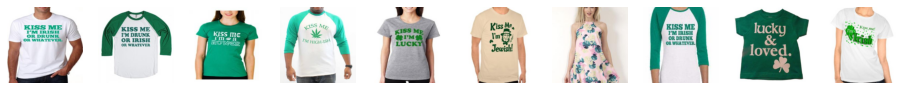

In [194]:
search_by_style_display('/home/mohit/Downloads/img/227.jpg') #227,72

In [195]:
def search_by_style(reference_image, max_results=10):
    v0 = image_style_embeddings[reference_image]
    distances = {}
    for k,v in image_style_embeddings.items():
        d = sc.spatial.distance.cosine(v0, v)
        distances[k] = d

    sorted_neighbors = sorted(distances.items(), key=lambda x: x[1], reverse=False)
    return sorted_neighbors[:11]

In [196]:
search_by_style('/home/mohit/Downloads/img/227.jpg')

[('/home/mohit/Downloads/test1/227.jpg', 0),
 ('/home/mohit/Downloads/test1/241.jpg', 0.040853798389434814),
 ('/home/mohit/Downloads/test1/248.jpg', 0.05297130346298218),
 ('/home/mohit/Downloads/test1/230.jpg', 0.05472344160079956),
 ('/home/mohit/Downloads/test1/233.jpg', 0.05775761604309082),
 ('/home/mohit/Downloads/test1/229.jpg', 0.06255346536636353),
 ('/home/mohit/Downloads/test1/29.jpg', 0.07456350326538086),
 ('/home/mohit/Downloads/test1/272.jpg', 0.07556259632110596),
 ('/home/mohit/Downloads/test1/261.jpg', 0.07879525423049927),
 ('/home/mohit/Downloads/test1/262.jpg', 0.07968956232070923),
 ('/home/mohit/Downloads/test1/32.jpg', 0.0803496241569519)]

In [197]:
x = []
for image_name in tqdm(images.keys()):
    z = search_by_style(image_name)
    x.append(z)
    #print(len(x))
    if len(x) == 500:
      break

100%|████████████████████████████████████████▉| 499/500 [00:47<00:00, 10.46it/s]


In [198]:
y = pd.DataFrame(x)
y

,0,1,2,3,4,5,6,7,8,9,10
0,"(/home/mohit/Downloads/test1/42.jpg, 0)","(/home/mohit/Downloads/test1/432.jpg, 0.082776...","(/home/mohit/Downloads/test1/308.jpg, 0.085174...","(/home/mohit/Downloads/test1/122.jpg, 0.092142...","(/home/mohit/Downloads/test1/292.jpg, 0.094699...","(/home/mohit/Downloads/test1/43.jpg, 0.1011090...","(/home/mohit/Downloads/test1/449.jpg, 0.114505...","(/home/mohit/Downloads/test1/296.jpg, 0.116736...","(/home/mohit/Downloads/test1/167.jpg, 0.119880...","(/home/mohit/Downloads/test1/397.jpg, 0.120467...","(/home/mohit/Downloads/test1/381.jpg, 0.124707..."
1,"(/home/mohit/Downloads/test1/320.jpg, 0)","(/home/mohit/Downloads/test1/402.jpg, 0.008468...","(/home/mohit/Downloads/test1/334.jpg, 0.008764...","(/home/mohit/Downloads/test1/28.jpg, 0.0102543...","(/home/mohit/Downloads/test1/319.jpg, 0.012121...","(/home/mohit/Downloads/test1/344.jpg, 0.012126...","(/home/mohit/Downloads/test1/417.jpg, 0.013364...","(/home/mohit/Downloads/test1/361.jpg, 0.014118...","(/home/mohit/Downloads/test1/443.jpg, 0.014483...","(/home/mohit/Downloads/test1/191.jpg, 0.015273...","(/home/mohit/Downloads/test1/67.jpg, 0.0166535..."
2,"(/home/mohit/Downloads/test1/495.jpg, 0)","(/home/mohit/Downloads/test1/178.jpg, 0.051529...","(/home/mohit/Downloads/test1/342.jpg, 0.059193...","(/home/mohit/Downloads/test1/322.jpg, 0.063368...","(/home/mohit/Downloads/test1/41.jpg, 0.0709385...","(/home/mohit/Downloads/test1/30.jpg, 0.0832694...","(/home/mohit/Downloads/test1/328.jpg, 0.084324...","(/home/mohit/Downloads/test1/238.jpg, 0.085140...","(/home/mohit/Downloads/test1/224.jpg, 0.088852...","(/home/mohit/Downloads/test1/439.jpg, 0.095385...","(/home/mohit/Downloads/test1/208.jpg, 0.102892..."
3,"(/home/mohit/Downloads/test1/185.jpg, 0)","(/home/mohit/Downloads/test1/163.jpg, 0.012052...","(/home/mohit/Downloads/test1/73.jpg, 0.0132434...","(/home/mohit/Downloads/test1/318.jpg, 0.014246...","(/home/mohit/Downloads/test1/246.jpg, 0.014430...","(/home/mohit/Downloads/test1/203.jpg, 0.015535...","(/home/mohit/Downloads/test1/99.jpg, 0.0162411...","(/home/mohit/Downloads/test1/243.jpg, 0.017581...","(/home/mohit/Downloads/test1/340.jpg, 0.017933...","(/home/mohit/Downloads/test1/215.jpg, 0.018358...","(/home/mohit/Downloads/test1/209.jpg, 0.018508..."
4,"(/home/mohit/Downloads/test1/149.jpg, 0)","(/home/mohit/Downloads/test1/313.jpg, 0.043078...","(/home/mohit/Downloads/test1/438.jpg, 0.043709...","(/home/mohit/Downloads/test1/123.jpg, 0.048890...","(/home/mohit/Downloads/test1/154.jpg, 0.052407...","(/home/mohit/Downloads/test1/75.jpg, 0.0527044...","(/home/mohit/Downloads/test1/268.jpg, 0.052788...","(/home/mohit/Downloads/test1/132.jpg, 0.053081...","(/home/mohit/Downloads/test1/356.jpg, 0.053528...","(/home/mohit/Downloads/test1/243.jpg, 0.054203...","(/home/mohit/Downloads/test1/102.jpg, 0.054326..."
...,...,...,...,...,...,...,...,...,...,...,...
495,"(/home/mohit/Downloads/test1/188.jpg, 0)","(/home/mohit/Downloads/test1/144.jpg, 0.059759...","(/home/mohit/Downloads/test1/317.jpg, 0.063799...","(/home/mohit/Downloads/test1/108.jpg, 0.065218...","(/home/mohit/Downloads/test1/273.jpg, 0.068221...","(/home/mohit/Downloads/test1/412.jpg, 0.074749...","(/home/mohit/Downloads/test1/360.jpg, 0.074902...","(/home/mohit/Downloads/test1/483.jpg, 0.076249...","(/home/mohit/Downloads/test1/117.jpg, 0.078026...","(/home/mohit/Downloads/test1/271.jpg, 0.080662...","(/home/mohit/Downloads/test1/331.jpg, 0.081271..."
496,"(/home/mohit/Downloads/test1/498.jpg, 0)","(/home/mohit/Downloads/test1/469.jpg, 0.036431...","(/home/mohit/Downloads/test1/178.jpg, 0.052872...","(/home/mohit/Downloads/test1/295.jpg, 0.053265...","(/home/mohit/Downloads/test1/496.jpg, 0.062325...","(/home/mohit/Downloads/test1/492.jpg, 0.065888...","(/home/mohit/Downloads/test1/467.jpg, 0.067757...","(/home/mohit/Downloads/test1/338.jpg, 0.069287...","(/home/mohit/Downloads/test1/461.jpg, 0.069590...","(/home/mohit/Downloads/test1/470.jpg, 0.070462...","(/home/mohit/Download

In [199]:
def test(neigh):
  return neigh[0]

In [200]:
z = y.applymap(test)
z

,0,1,2,3,4,5,6,7,8,9,10
0,/home/mohit/Downloads/test1/42.jpg,/home/mohit/Downloads/test1/432.jpg,/home/mohit/Downloads/test1/308.jpg,/home/mohit/Downloads/test1/122.jpg,/home/mohit/Downloads/test1/292.jpg,/home/mohit/Downloads/test1/43.jpg,/home/mohit/Downloads/test1/449.jpg,/home/mohit/Downloads/test1/296.jpg,/home/mohit/Downloads/test1/167.jpg,/home/mohit/Downloads/test1/397.jpg,/home/mohit/Downloads/test1/381.jpg
1,/home/mohit/Downloads/test1/320.jpg,/home/mohit/Downloads/test1/402.jpg,/home/mohit/Downloads/test1/334.jpg,/home/mohit/Downloads/test1/28.jpg,/home/mohit/Downloads/test1/319.jpg,/home/mohit/Downloads/test1/344.jpg,/home/mohit/Downloads/test1/417.jpg,/home/mohit/Downloads/test1/361.jpg,/home/mohit/Downloads/test1/443.jpg,/home/mohit/Downloads/test1/191.jpg,/home/mohit/Downloads/test1/67.jpg
2,/home/mohit/Downloads/test1/495.jpg,/home/mohit/Downloads/test1/178.jpg,/home/mohit/Downloads/test1/342.jpg,/home/mohit/Downloads/test1/322.jpg,/home/mohit/Downloads/test1/41.jpg,/home/mohit/Downloads/test1/30.jpg,/home/mohit/Downloads/test1/328.jpg,/home/mohit/Downloads/test1/238.jpg,/home/mohit/Downloads/test1/224.jpg,/home/mohit/Downloads/test1/439.jpg,/home/mohit/Downloads/test1/208.jpg
3,/home/mohit/Downloads/test1/185.jpg,/home/mohit/Downloads/test1/163.jpg,/home/mohit/Downloads/test1/73.jpg,/home/mohit/Downloads/test1/318.jpg,/home/mohit/Downloads/test1/246.jpg,/home/mohit/Downloads/test1/203.jpg,/home/mohit/Downloads/test1/99.jpg,/home/mohit/Downloads/test1/243.jpg,/home/mohit/Downloads/test1/340.jpg,/home/mohit/Downloads/test1/215.jpg,/home/mohit/Downloads/test1/209.jpg
4,/home/mohit/Downloads/test1/149.jpg,/home/mohit/Downloads/test1/313.jpg,/home/mohit/Downloads/test1/438.jpg,/home/mohit/Downloads/test1/123.jpg,/home/mohit/Downloads/test1/154.jpg,/home/mohit/Downloads/test1/75.jpg,/home/mohit/Downloads/test1/268.jpg,/home/mohit/Downloads/test1/132.jpg,/home/mohit/Downloads/test1/356.jpg,/home/mohit/Downloads/test1/243.jpg,/home/mohit/Downloads/test1/102.jpg
...,...,...,...,...,...,...,...,...,...,...,...
495,/home/mohit/Downloads/test1/188.jpg,/home/mohit/Downloads/test1/144.jpg,/home/mohit/Downloads/test1/317.jpg,/home/mohit/Downloads/test1/108.jpg,/home/mohit/Downloads/test1/273.jpg,/home/mohit/Downloads/test1/412.jpg,/home/mohit/Downloads/test1/360.jpg,/home/mohit/Downloads/test1/483.jpg,/home/mohit/Downloads/test1/117.jpg,/home/mohit/Downloads/test1/271.jpg,/home/mohit/Downloads/test1/331.jpg
496,/home/mohit/Downloads/test1/498.jpg,/home/mohit/Downloads/test1/469.jpg,/home/mohit/Downloads/test1/178.jpg,/home/mohit/Downloads/test1/295.jpg,/home/mohit/Downloads/test1/496.jpg,/home/mohit/Downloads/test1/492.jpg,/home/mohit/Downloads/test1/467.jpg,/home/mohit/Downloads/test1/338.jpg,/home/mohit/Downloads/test1/461.jpg,/home/mohit/Downloads/test1/470.jpg,/home/mohit/Downloads/test1/116.jpg
497,/home/mohit/Downloads/test1/329.jpg,/home/mohit/Downloads/test1/359.jpg,/home/mohit/Downloads/test1/447.jpg,/home/mohit/Downloads/test1/123.jpg,/home/mohit/Downloads/test1/332.jpg,/home/mohit/Downloads/test1/375.jpg,/home/mohit/Downloads/test1/185.jpg,/home/mohit/Downloads/test1/125.jpg,/home/mohit/Downloads/test1/246.jpg,/home/mohit/Downloads/test1/156.jpg,/home/mohit/Downloads/test1/215.jpg
498,/home/mohit/Downloads/test1/31.jpg,/home/mohit/Downloads/test1/55.jpg,/home/mohit/Downloads/test1/301.jpg,/home/mohit/Downloads/test1/52.jpg,/home/mohit/Downloads/test1/354.jpg,/home/mohit/Downloads/test1/56.jpg,/home/mohit/Downloads/test1/494.jpg,/home/mohit/Downloads/test1/1.jpg,/home/mohit/Downloads/test1/341.jpg,/home/mohit/Downloads/test1/12.jpg,/home/mohit/Downloads/test1/291.jpg


In [201]:
z.to_csv('Similarity.csv')